<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Permutation_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type','indeks']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

X['m/n'] = X['m/n'].apply(lambda x: x*100000)
X['(m/n)^2'] = X['(m/n)^2'].apply(lambda x: x*100000)
X['(m/n)^3'] = X['(m/n)^3'].apply(lambda x: x*100000)
shuffled = shuffled.drop(['CPLEXStatus', 'indeks', 'index'], axis = 1)
print(X.head())

   subtype  class    n   m   n/m  (n/m)^2   (n/m)^3      m/n  (m/n)^2  \
0       11      7  180  30   6.0    36.00   216.000  16666.7   2777.8   
1        9      6  126  28   4.5    20.25    91.125  22222.2   4938.3   
2       13      5  140  14  10.0   100.00  1000.000  10000.0   1000.0   
3        5      1  126  42   3.0     9.00    27.000  33333.3  11111.1   
4        5      5  108  36   3.0     9.00    27.000  33333.3  11111.1   

   (m/n)^3   av.length     std.dev  median  range  min   max    k  
0    463.0  704.116638  181.386215   702.0    900  282  1182  154  
1   1097.4  320.476196  111.572891   333.0    365  129   494  107  
2    100.0  106.342857   47.798710   109.5    235    4   239   98  
3   3703.7   54.103176   28.623859    57.5     97    2    99   74  
4   3703.7  102.435188   51.635719   103.5    249    2   251   84  


In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)


regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [3]:
from sklearn.metrics import mean_squared_error

rmse_full_mod = mean_squared_error(regr.predict(X_test), y_test, squared = False)

results = []

X = pd.DataFrame(X, columns=select)
X_test = pd.DataFrame(X_test, columns=X.columns)

for predictor in X_test:
    #print(predictor)
    X_test_copy = X_test.copy()
    #X_test_copy = X_test_copy.astype('int')
    
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    new_rmse = mean_squared_error(regr.predict(X_test_copy), y_test, squared = False)
    
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

resultsdf = pd.DataFrame(results).sort_values(by = 'score', ascending = False)
resultsdf



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

,pred,score
11,std.dev,13978.681279
2,n,6243.073112
13,range,3699.917888
10,av.length,3684.632736
16,k,3148.927746
9,(m/n)^3,2078.896420
15,max,1864.497733
12,median,1496.361954
8,(m/n)^2,1359.561007
7,m/n,1224.857604


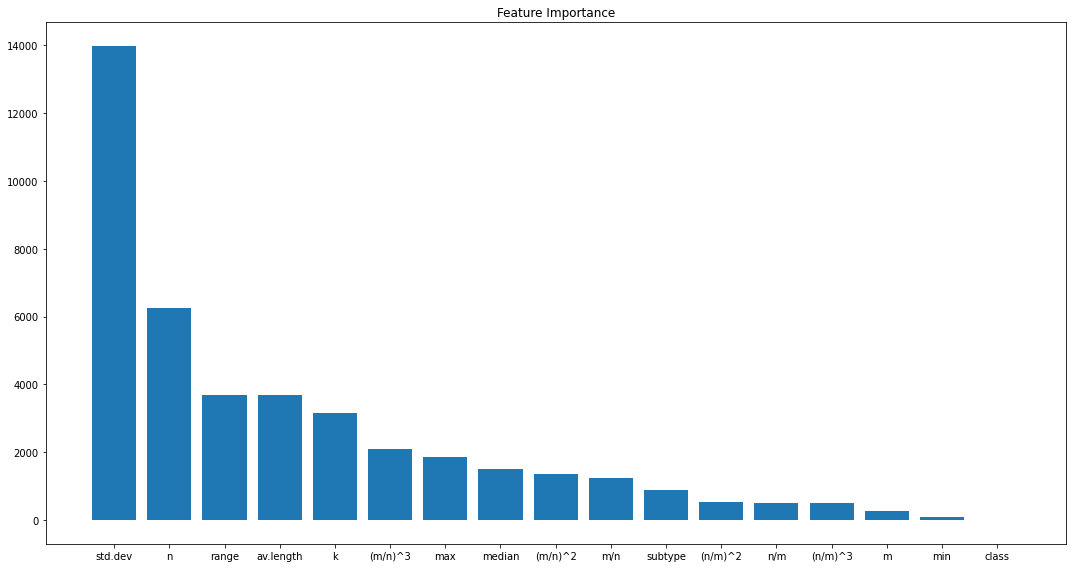

In [4]:
plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(resultsdf.pred, resultsdf.score)
plt.tight_layout()
plt.show()